In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core/')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import flg_unet
import flg_numerics
import flg_model
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import copy

fast_mode = True

In [2]:
all_data = fls.load_all_train_data()
np.random.default_rng(seed=0).shuffle(all_data)

# Pick N tomograms with 1 motor and N tomograms with 0 motors as validation set
N=100
n_motors = np.array([len(d.labels) for d in all_data])
inds_zero = np.argwhere(n_motors==0)[:N,0]
inds_one = np.argwhere(n_motors==1)[:N,0]
inds_test = np.concatenate((inds_zero,inds_one))
inds_train = np.setdiff1d(np.arange(len(n_motors)), inds_test)
inds_test.shape, inds_train.shape

train_data = []
for i in inds_train:
    train_data.append(all_data[i])
test_data = []
for i in inds_test:
    test_data.append(all_data[i])
np.random.default_rng(seed=0).shuffle(test_data)
test_data = test_data
if fast_mode:
    test_data = test_data[1:3]
len(train_data), len(test_data)

(444, 2)

ii 0
0 1 2  
0.0


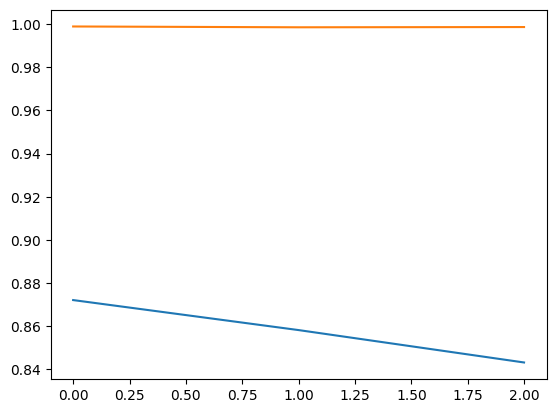

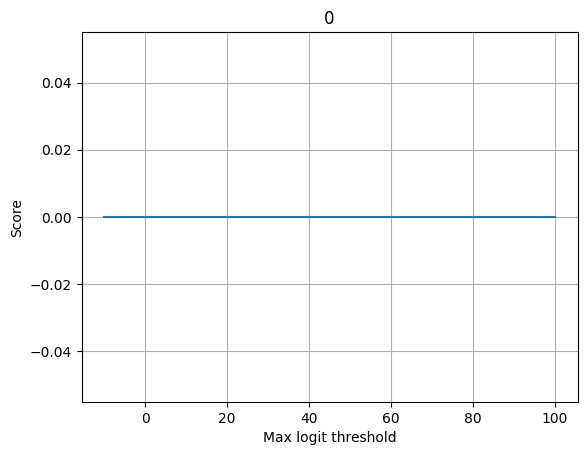

In [3]:
N=5
if fast_mode: N=1
for ii in range(N):
    print('ii', ii)
    model = flg_model.ThreeStepModel()
    model.step1Heatmap.n_epochs = 1700
    if fast_mode: model.step1Heatmap.n_epochs = 3
    model.step2Labels.threshold = -2.
    model.train(train_data, test_data)
    print(' ')
    inferred_test_data = model.infer(test_data)
    print(fls.score_competition_metric(inferred_test_data, test_data))
    if not fast_mode:
        fls.dill_save(fls.model_dir + 'model' + str(ii) + '.pickle', (model, fls.score_competition_metric(inferred_test_data, test_data)))
    plt.title(str(ii))
    plt.pause(0.1)

In [5]:
model.infer(fls.load_all_test_data()[1:3])

[Data(is_train=False, name='tomo_00e047', labels=     z    y    x       size  max_logit
 0  150  479  464  266985600   0.085632, labels_unfiltered=     z    y    x       size  max_logit
 0  150  479  464  266985600   0.085632, loaded_state='unloaded', data=None, data_shape=(300, 959, 928), voxel_spacing=nan, mean_per_slice=array([], dtype=float64), std_per_slice=array([], dtype=float64)),
 Data(is_train=False, name='tomo_01a877', labels=     z    y    x       size  max_logit
 0  150  480  464  267264000   0.090088, labels_unfiltered=     z    y    x       size  max_logit
 0  150  480  464  267264000   0.090088, loaded_state='unloaded', data=None, data_shape=(300, 960, 928), voxel_spacing=nan, mean_per_slice=array([], dtype=float64), std_per_slice=array([], dtype=float64))]